<a href="https://colab.research.google.com/github/rafiag/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [ ]:
# Load dataset
df = pd.read_csv('https://github.com/rafiag/Heart-Failure-Prediction/raw/main/heart_failure_clinical_records_dataset.csv')

# print(df_bank.info())
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

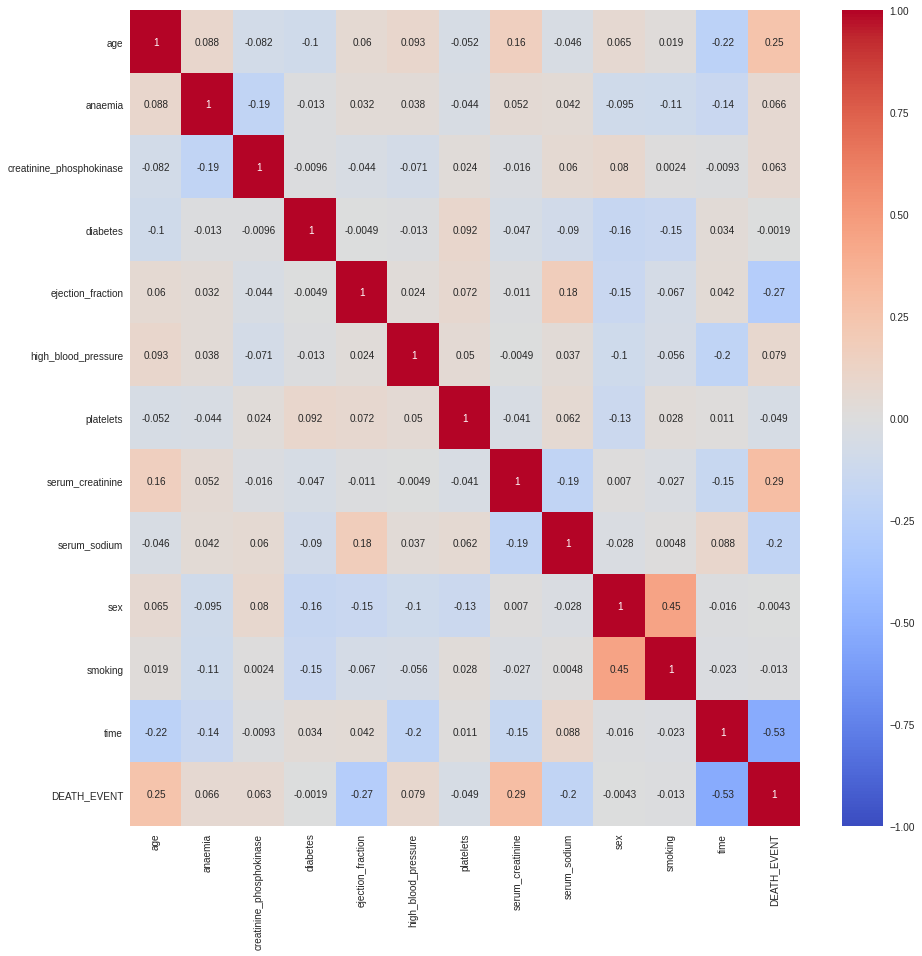

In [ ]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

# Best feature

In [ ]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [ ]:
x = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
scaler = StandardScaler()
num_cols = ['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
x_scaled = scaler.fit_transform(x)

x_scaled

array([[-1.53055953,  0.49005699, -1.50403612, -1.62950241],
       [-0.00707675, -0.28455235, -0.14197615, -1.60369074],
       [-1.53055953, -0.09090002, -1.73104612, -1.5907849 ],
       ...,
       [ 1.85495776, -0.57503085,  0.31204384,  1.90669738],
       [-0.00707675,  0.00592615,  0.76606383,  1.93250906],
       [ 0.58538877,  0.19957848, -0.14197615,  1.99703825]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled ,y, random_state=1, test_size=0.2)

In [ ]:
from xgboost import XGBClassifier
# from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, 
                    cv=skf.split(x_train,y_train), verbose=0 )

grid.fit(x_train ,y_train, early_stopping_rounds=30, eval_set=[(x_test, y_test)])

[0]	validation_0-error:0.133333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.133333
[2]	validation_0-error:0.233333
[3]	validation_0-error:0.25
[4]	validation_0-error:0.133333
[5]	validation_0-error:0.1
[6]	validation_0-error:0.116667
[7]	validation_0-error:0.15
[8]	validation_0-error:0.116667
[9]	validation_0-error:0.1
[10]	validation_0-error:0.1
[11]	validation_0-error:0.1
[12]	validation_0-error:0.1
[13]	validation_0-error:0.116667
[14]	validation_0-error:0.116667
[15]	validation_0-error:0.1
[16]	validation_0-error:0.066667
[17]	validation_0-error:0.083333
[18]	validation_0-error:0.066667
[19]	validation_0-error:0.066667
[20]	validation_0-error:0.066667
[21]	validation_0-error:0.066667
[22]	validation_0-error:0.05
[23]	validation_0-error:0.05
[24]	validation_0-error:0.066667
[25]	validation_0-error:0.066667
[26]	validation_0-error:0.066667
[27]	validation_0-error:0.05
[28]	validation_0-error:0.05
[29]	validation_0-error:0.066667
[30]	val

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa4a3cf7d00>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2,

In [ ]:
from sklearn import metrics

best_grid = grid.best_estimator_
best_grid_pred = best_grid.predict(x_test)

# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_acc = metrics.accuracy_score(y_test, best_grid_pred)
best_grid_prec = metrics.precision_score(y_test, best_grid_pred)
best_grid_rec = metrics.recall_score(y_test, best_grid_pred)
best_grid_f1 = metrics.f1_score(y_test, best_grid_pred)
best_grid_kappa = metrics.cohen_kappa_score(y_test, best_grid_pred)

# Calculate area under curve (AUC)
best_grid_pred_proba = best_grid.predict_proba(x_test)[::,1]
best_grid_fpr, best_grid_tpr, _ = metrics.roc_curve(y_test,  best_grid_pred_proba)
best_grid_auc = metrics.roc_auc_score(y_test, best_grid_pred_proba)

print('Accuracy:', best_grid_acc)
print('Precision:', best_grid_prec)
print('Recall:', best_grid_rec)
print('F1 score:', best_grid_f1)
print('Cohen Kappa Score:', best_grid_kappa)
print('AUC:', best_grid_auc)

# Display confussion matrix
cm = metrics.confusion_matrix(y_test, best_grid_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.95
Precision: 1.0
Recall: 0.7857142857142857
F1 score: 0.88
Cohen Kappa Score: 0.848993288590604
AUC: 0.9518633540372671
Confusion Matrix:
 [[46  0]
 [ 3 11]]


# Easy feature

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
x = df[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
scaler = StandardScaler()
num_cols = ['age', 'time']
x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 1.19294523, -0.87110478, -0.84757938, ...,  0.73568819,
        -0.68768191, -1.62950241],
       [-0.49127928, -0.87110478, -0.84757938, ...,  0.73568819,
        -0.68768191, -1.60369074],
       [ 0.35083298, -0.87110478, -0.84757938, ...,  0.73568819,
         1.4541607 , -1.5907849 ],
       ...,
       [-1.33339153, -0.87110478,  1.1798305 , ..., -1.35927151,
        -0.68768191,  1.90669738],
       [-1.33339153, -0.87110478, -0.84757938, ...,  0.73568819,
         1.4541607 ,  1.93250906],
       [-0.9123354 , -0.87110478, -0.84757938, ...,  0.73568819,
         1.4541607 ,  1.99703825]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled ,y, random_state=1, test_size=0.2)

In [ ]:
from xgboost import XGBClassifier
# from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, 
                    cv=skf.split(x_train,y_train), verbose=0 )

grid.fit(x_train ,y_train, early_stopping_rounds=30, eval_set=[(x_test, y_test)])

[0]	validation_0-error:0.133333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.133333
[2]	validation_0-error:0.133333
[3]	validation_0-error:0.133333
[4]	validation_0-error:0.133333
[5]	validation_0-error:0.133333
[6]	validation_0-error:0.133333
[7]	validation_0-error:0.133333
[8]	validation_0-error:0.133333
[9]	validation_0-error:0.133333
[10]	validation_0-error:0.133333
[11]	validation_0-error:0.133333
[12]	validation_0-error:0.133333
[13]	validation_0-error:0.133333
[14]	validation_0-error:0.133333
[15]	validation_0-error:0.133333
[16]	validation_0-error:0.133333
[17]	validation_0-error:0.133333
[18]	validation_0-error:0.133333
[19]	validation_0-error:0.133333
[20]	validation_0-error:0.133333
[21]	validation_0-error:0.133333
[22]	validation_0-error:0.133333
[23]	validation_0-error:0.133333
[24]	validation_0-error:0.133333
[25]	validation_0-error:0.133333
[26]	validation_0-error:0.133333
[27]	validation_0-error:0.133333
[28]	validation_0-er

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa4a44630f8>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2,

In [ ]:
from sklearn import metrics

best_grid = grid.best_estimator_
best_grid_pred = best_grid.predict(x_test)

# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_acc = metrics.accuracy_score(y_test, best_grid_pred)
best_grid_prec = metrics.precision_score(y_test, best_grid_pred)
best_grid_rec = metrics.recall_score(y_test, best_grid_pred)
best_grid_f1 = metrics.f1_score(y_test, best_grid_pred)
best_grid_kappa = metrics.cohen_kappa_score(y_test, best_grid_pred)

# Calculate area under curve (AUC)
best_grid_pred_proba = best_grid.predict_proba(x_test)[::,1]
best_grid_fpr, best_grid_tpr, _ = metrics.roc_curve(y_test,  best_grid_pred_proba)
best_grid_auc = metrics.roc_auc_score(y_test, best_grid_pred_proba)

print('Accuracy:', best_grid_acc)
print('Precision:', best_grid_prec)
print('Recall:', best_grid_rec)
print('F1 score:', best_grid_f1)
print('Cohen Kappa Score:', best_grid_kappa)
print('AUC:', best_grid_auc)

# Display confussion matrix
cm = metrics.confusion_matrix(y_test, best_grid_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8666666666666667
Precision: 0.75
Recall: 0.6428571428571429
F1 score: 0.6923076923076924
Cohen Kappa Score: 0.6078431372549019
AUC: 0.8586956521739131
Confusion Matrix:
 [[43  3]
 [ 5  9]]
